__`Pandas`__ - Biblioteka stworzona przez Wesa MacKinney (Mathematician at heart) pozwalająca na szybką i wygodną analizę danych. Najważniejsze zalety to:
- bardzo łatwa w używaniu,
- posiada obszerną dokumentację wraz z przykładami,
- bardzo wydajna,
- zbudowana na bazie bibliotek Numpy i Scipy oraz Matplotlib,
- umożliwia odczyt i zapis danych w bardzo wielu formatach (csv, xls, json, itp.),
- umożliwia odczyt i zapis wprost z/do baz danych,
- darmowa (licencja BSD).

https://pandas.pydata.org

Importowana najczęściej w poniższy sposób:

In [1]:
import pandas as pd
pd.__version__

'0.23.4+0.g0409521.dirty'

__Podstawowe typy danych - `Series`.__

`pd.Series` - jednowymiarowy kolekcja danych (jedna kolumna).
- podklasa klasy `numpy.ndarray`,
- może zawierać dane dowolnego typu,
- elementy etykietowane są według indeksu, który nie musi być uporządkowany.

Istnieje wiele metod tworzenia obiektu `Series` jednak do najpopularniejszych należy tworzenie z obiektu listy lub wprost z pliku.  

In [2]:
s = pd.Series([2, 4, 6, 8])
s

0    2
1    4
2    6
3    8
dtype: int64

`Series.index`:
- gdy wczytując dane nie określimy wartości indeksu, generowany jest on automatycznie jako ciąg liczb całkowitych od zera,
- indeks może zostać narzucony podczas tworzenia obiektu `Series` lub modyfikowany w dowolnym momencie,
- za pomocą indeksu możemy odwołać się do konkretnych danych. 

In [3]:
s = pd.Series([2, 4, 6, 8], index=['a', 'b', 'c', 'd'])
s

a    2
b    4
c    6
d    8
dtype: int64

In [4]:
# wybór jednej wartości
s['b']

4

In [5]:
# wybór kilku wartości
s[['a', 'c']]

a    2
c    6
dtype: int64

O danych w postaci obiektu `Series` można myśleć jak o uporządkowanym słowniku, z tą różnicą, że wartości indeksów nie muszą być unikalne.

In [6]:
s = pd.Series([2, 4, 6, 8], index=['a', 'b', 'a', 'd'])
s

a    2
b    4
a    6
d    8
dtype: int64

In [7]:
s['a']

a    2
a    6
dtype: int64

In [8]:
type(s['a'])

pandas.core.series.Series

In [9]:
s.iloc[0]

2

- Wartości obieku dostępne są również w atrybucie `values`, który jest obiektem `ndarray` z pakietu Numpy. 
- Stąd możliwe jest wykonywanie operacji arytmetycznych, logicznych itp. w taki sam sposób jak na tablicach `array` z tą różnicą że operacje takie jak np. dodawanie wykonywane sa na elenetach o tym samym indeksie.

In [10]:
s = pd.Series([2, 4, 6, 8], index=['a', 'b', 'c', 'd'])
s>4

a    False
b    False
c     True
d     True
dtype: bool

In [11]:
s[s>4]

c    6
d    8
dtype: int64

In [12]:
s*2

a     4
b     8
c    12
d    16
dtype: int64

In [13]:
import numpy as np
np.sin(s)

a    0.909297
b   -0.756802
c   -0.279415
d    0.989358
dtype: float64

In [14]:
s2 = pd.Series([2, 4, 6, 8, 10, 12], index=['a', 'b', 'c', 'e', 'f', 'd'])
s2

a     2
b     4
c     6
e     8
f    10
d    12
dtype: int64

In [15]:
s+s2

a     4.0
b     8.0
c    12.0
d    20.0
e     NaN
f     NaN
dtype: float64

- Możliwe jest również rysowanie wykresów bezpośrednio z obiektów `Series`.

<IPython.core.display.Javascript object>


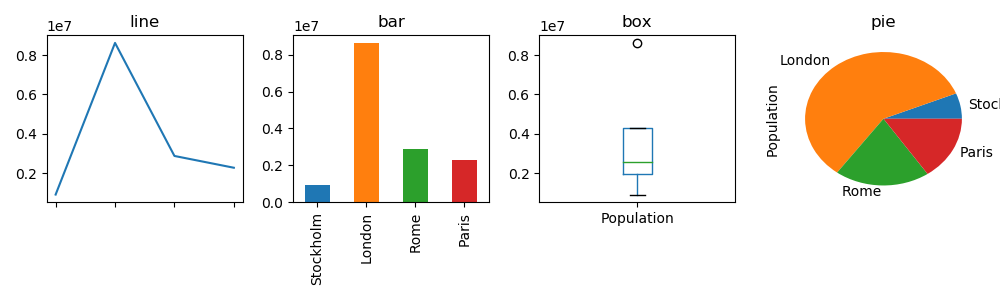

In [16]:
%matplotlib notebook
import matplotlib.pyplot as plt

s = pd.Series([909976, 8615246, 2872086, 2273305], index=["Stockholm", "London", "Rome", "Paris"], name="Population")
fig, axes = plt.subplots(1, 4, figsize=(10, 3))
s.plot(ax=axes[0], kind='line', title="line")
s.plot(ax=axes[1], kind='bar', title="bar")
s.plot(ax=axes[2], kind='box', title="box")
s.plot(ax=axes[3], kind='pie', title="pie")
fig.tight_layout()

__Szeregi czasowe.__

In [17]:
import pandas as pd
import datetime

In [18]:
pd.date_range("2015-1-1", periods=31)

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
               '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
               '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20',
               '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24',
               '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
               '2015-01-29', '2015-01-30', '2015-01-31'],
              dtype='datetime64[ns]', freq='D')

In [19]:
pd.date_range(datetime.datetime(2015, 1, 1), periods=31)

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
               '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
               '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20',
               '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24',
               '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
               '2015-01-29', '2015-01-30', '2015-01-31'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range("2015-1-1 00:00", "2015-1-1 12:00", freq="H")

In [20]:
ts1 = pd.Series(np.arange(31), index=pd.date_range("2015-1-1", periods=31))
ts1.head(10)

2015-01-01    0
2015-01-02    1
2015-01-03    2
2015-01-04    3
2015-01-05    4
2015-01-06    5
2015-01-07    6
2015-01-08    7
2015-01-09    8
2015-01-10    9
Freq: D, dtype: int32

In [21]:
ts1["2015-1-3"]

2

In [22]:
ts1.index[2]

Timestamp('2015-01-03 00:00:00', freq='D')

In [23]:
ts1.index[2].year, ts1.index[2].month, ts1.index[2].day

(2015, 1, 3)

In [24]:
ts2 = pd.Series(np.random.randn(100), index=pd.date_range("2015-1-1", periods=100))
ts2.head()

2015-01-01   -0.312836
2015-01-02    0.424790
2015-01-03   -0.395375
2015-01-04   -1.215621
2015-01-05    0.711227
Freq: D, dtype: float64

<IPython.core.display.Javascript object>


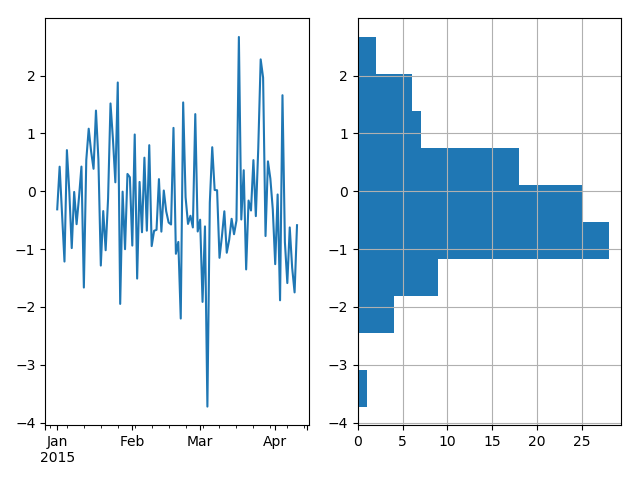

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ts2.plot(ax=ax1)
ts2.hist(ax=ax2, orientation="horizontal")
fig.tight_layout()

__Podstawowe typy danych - `DataFrame`.__

`pd.DataFrame` - dwuwymiarowa kolekcja danych (tabela).
- podklasa klasy `numpy.ndarray`,
- każda kolumna może zawierać dane innego typu,
- indeks zarówno po wierszach jak i po kolumnach,
- każda kolumna to obiekt `Series`,
- możliwość dodawanie i usuwania kolumn,

Istnieje wiele metod tworzenia obiektu `DataFrame` jednak do najpopularniejszych należy tworzenie z obiektu listy dwu wymiarowej, słownika lub wprost z pliku. 

In [26]:
# z listy, lista list tej samej długości 
df = pd.DataFrame([[1,2,3],[1,2,3]], columns=['A','B','C'])
df

,A,B,C
0,1,2,3
1,1,2,3


In [27]:
# ze słownika list tej samej długości
dic = {'A': [1,2], 'B': [1,2], 'C': [1, 2]}
df = pd.DataFrame(dic)
df

,A,B,C
0,1,1,1
1,2,2,2


In [28]:
# ze słownika słowników
dic = {'A': {'a':1, 'b':2}, 'B': {'b':1,'c':2}, 'C': {'a':1,'c':2}}
df = pd.DataFrame(dic)
df

,A,B,C
a,1.0,NaN,1.0
b,2.0,1.0,NaN
c,NaN,2.0,2.0


In [29]:
# z pliku
df = pd.read_csv('european_cities.csv')  # patrze dokumentacja
df

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1 June 2014
1,2,Berlin,Germany,"3,437,916",31 May 2014
2,3,Madrid,Spain,"3,165,235",1 January 2014
3,4,Rome,Italy,"2,872,086",30 September 2014
4,5,Paris,France,"2,273,305",1 January 2013
5,6,Bucharest,Romania,"1,883,425",20 October 2011
6,7,Vienna,Austria,"1,794,770",1 January 2015
7,8,Hamburg[10],Germany,"1,746,342",30 December 2013
8,9,Budapest,Hungary,"1,744,665",1 January 2014
9,10,Warsaw,Poland,"1,729,119",31 March 2014


- Do każdej kolumny można odwołać się poprzez jej nazwę i rozważać jako obiekt `Series`.

In [30]:
df = pd.read_csv('european_cities.csv', index_col='Rank', thousands=',', skipinitialspace=True) # patrze dokumentacja
df.columns

Index(['City', 'State', 'Population', 'Date of census/estimate'], dtype='object')

In [31]:
df['State']  # lub df.State

Rank
1      United Kingdom
2             Germany
3               Spain
4               Italy
5              France
6             Romania
7             Austria
8             Germany
9             Hungary
10             Poland
11              Spain
12            Germany
13              Italy
14           Bulgaria
15     Czech Republic
16            Belgium
17     United Kingdom
18            Germany
19              Italy
20             Sweden
21              Italy
22             France
23        Netherlands
24            Croatia
25              Spain
26             Poland
27     United Kingdom
28             Poland
29            Germany
30             Latvia
            ...      
76     Czech Republic
77             Poland
78            Germany
79              Spain
80     United Kingdom
81             Poland
82             France
83            Germany
84           Bulgaria
85           Bulgaria
86              Spain
87     United Kingdom
88        Netherlands
89              Spain
90   

- Za pomocą metody `unique()` możemy wyświetlić tylko unikalne wartości/rekordy

In [32]:
df.State.unique()

array(['United Kingdom', 'Germany', 'Spain', 'Italy', 'France', 'Romania',
       'Austria', 'Hungary', 'Poland', 'Bulgaria', 'Czech Republic',
       'Belgium', 'Sweden', 'Netherlands', 'Croatia', 'Latvia', 'Greece',
       'Finland', 'Denmark', 'Portugal', 'Lithuania', 'Ireland',
       'Estonia', 'Slovakia Slovak Republic'], dtype=object)

- Można wybrać również kilka kolumn

In [33]:
df[['City', 'Population']]

,City,Population
Rank,,
1,London[2],8615246
2,Berlin,3437916
3,Madrid,3165235
4,Rome,2872086
5,Paris,2273305
6,Bucharest,1883425
7,Vienna,1794770
8,Hamburg[10],1746342
9,Budapest,1744665


- Do każdego wiersza można odwołać się poprzez pozycję lub indeks.

In [35]:
df.loc[1]
# df.iloc[1]

City                            London[2]
State                      United Kingdom
Population                        8615246
Date of census/estimate       1 June 2014
Name: 1, dtype: object

- W podobny sposób możemy odwołać się do konkretnej komórki.

In [36]:
df.loc[1, 'Population']

8615246

In [37]:
df.loc[[1,2,3], ['City','Population']]

,City,Population
Rank,,
1,London[2],8615246
2,Berlin,3437916
3,Madrid,3165235


Metody `head(n)` i `tail(n)` - wyświetlanie `n` początkowych/końcowych wierszy.

In [38]:
df.head(5)

,City,State,Population,Date of census/estimate
Rank,,,,
1,London[2],United Kingdom,8615246,1 June 2014
2,Berlin,Germany,3437916,31 May 2014
3,Madrid,Spain,3165235,1 January 2014
4,Rome,Italy,2872086,30 September 2014
5,Paris,France,2273305,1 January 2013


In [39]:
df.tail()

,City,State,Population,Date of census/estimate
Rank,,,,
101,Bonn,Germany,309869,31 December 2012
102,Malmö,Sweden,309105,31 March 2013
103,Nottingham,United Kingdom,308735,30 June 2012
104,Katowice,Poland,308269,30 June 2012
105,Kaunas,Lithuania,306888,1 January 2013


`describe()` - podstawowe statystyki, tylko dla danych liczbowych, wartości brakujące są pomijane.

In [40]:
df.describe().T  #transpozycja dla lepszej czytelności

,count,mean,std,min,25%,50%,75%,max
Population,105.0,787679.085714,967222.167001,306888.0,351629.0,528014.0,757655.0,8615246.0


- Możemy dodawać i usuwać kolumny

In [41]:
df['MinusMax'] = df['Population'] - df['Population'].max()
df.head(5)

,City,State,Population,Date of census/estimate,MinusMax
Rank,,,,,
1,London[2],United Kingdom,8615246,1 June 2014,0
2,Berlin,Germany,3437916,31 May 2014,-5177330
3,Madrid,Spain,3165235,1 January 2014,-5450011
4,Rome,Italy,2872086,30 September 2014,-5743160
5,Paris,France,2273305,1 January 2013,-6341941


In [42]:
df = df.drop(['MinusMax'], axis=1)
df.head(5)

,City,State,Population,Date of census/estimate
Rank,,,,
1,London[2],United Kingdom,8615246,1 June 2014
2,Berlin,Germany,3437916,31 May 2014
3,Madrid,Spain,3165235,1 January 2014
4,Rome,Italy,2872086,30 September 2014
5,Paris,France,2273305,1 January 2013


- Tak jak na obiekcie `Series`tak na `DataFame` można operować jak na tablicach `array` z pakietu Numpy. 
- Dane w tabeli można sortować, grupować oraz agregować.

In [43]:
df = df.sort_values(by=['State', 'Population'])
df.head(5)

,City,State,Population,Date of census/estimate
Rank,,,,
7,Vienna,Austria,1794770,1 January 2015
59,Antwerp,Belgium,510610,1 January 2014
16,Brussels[17],Belgium,1175831,1 January 2014
85,Varna,Bulgaria,335819,31 December 2013
84,Plovdiv,Bulgaria,341041,31 December 2013


In [44]:
df = df.sort_values(by=['State', 'Population'], ascending=[1,0])
df.head(5)

,City,State,Population,Date of census/estimate
Rank,,,,
7,Vienna,Austria,1794770,1 January 2015
16,Brussels[17],Belgium,1175831,1 January 2014
59,Antwerp,Belgium,510610,1 January 2014
14,Sofia,Bulgaria,1291895,14 December 2014
84,Plovdiv,Bulgaria,341041,31 December 2013


In [45]:
df[df['Population'] < 500000].sort_index().head(10)

,City,State,Population,Date of census/estimate
Rank,,,,
60,Edinburgh,United Kingdom,495360,30 June 2011
61,Nuremberg,Germany,495121,31 December 2012
62,Duisburg,Germany,486816,31 December 2012
63,Lyon,France,484344,31 December 2010
64,Liverpool,United Kingdom,469690,30 June 2012
65,Gdańsk,Poland,460354,30 June 2012
66,Toulouse,France,441802,31 December 2010
67,Murcia,Spain,441354,1 January 2012
68,Tallinn,Estonia,434810,1 February 2015


In [46]:
df_grouped = df.groupby('State')
df_grouped

In [47]:
df_pl = df_grouped.get_group('Poland')
df_pl

,City,State,Population,Date of census/estimate
Rank,,,,
10,Warsaw,Poland,1729119,31 March 2014
26,Kraków,Poland,760700,31 March 2014
28,Łódź,Poland,709757,31 March 2014
35,Wrocław,Poland,632432,31 March 2014
48,Poznań,Poland,547161,31 March 2014
65,Gdańsk,Poland,460354,30 June 2012
71,Szczecin,Poland,409211,30 June 2012
77,Bydgoszcz,Poland,362286,30 June 2012
81,Lublin,Poland,348120,30 June 2012


In [48]:
df_agg = df_grouped.agg(['count','min', 'max', 'sum', 'mean']).sort_values(by=('Population','sum'), ascending=False)
df_agg

Population                                          
                              count      min      max       sum          mean
State                                                                        
United Kingdom                   16   308735  8615246  16011877  1.000742e+06
Germany                          19   309869  3437916  15119548  7.957657e+05
Spain                            13   311501  3165235  10041639  7.724338e+05
Italy                            10   315576  2872086   8764067  8.764067e+05
Poland                           10   308269  1729119   6267409  6.267409e+05
France                            5   343304  2273305   4395271  8.790542e+05
Romania                           3   319279  1883425   2527280  8.424267e+05
Netherlands                       4   330772   813562   2271771  5.679428e+05
Bulgaria                          3   335819  1291895   1968755  6.562517e+05
Austria                           1  1794770  1794770   1794770  1.794770e+06
Sweden                            3   309105   909976   1747095  5.823650e+05
Hungary                           1  1744665  1744665   1744665  1.744665e+06
Belgium                           2   510610  1175831   1686441  8.432205e+05
Czech Republic                    2   378327  1246780   1625107  8.125535e+05
Greece                            2   322240   664046    986286  4.931430e+05
Denmark                           2   326676   559440    886116  4.430580e+05
Lithuania                         2   306888   537152    844040  4.220200e+05
Croatia                           1   790017   790017    790017  7.900170e+05
Latvia                            1   701185   701185    701185  7.011850e+05
Finland                           1   605523   605523    605523  6.055230e+05
Portugal                          1   547631   547631    547631  5.476310e+05
Ireland                           1   527612   527612    527612  5.276120e+05
Estonia                           1   434810   434810    434810  4.348100e+05
Slovakia Slovak Republic          1   417389   417389    417389  4.173890e+05

__Brakujące dane.__

In [49]:
df_tit = pd.read_excel('titanic.xls')
df_tit.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [50]:
# brakujące dane w komórkach zastępowane są poprzez obiekt NaN
# zliczenie wszystkich brakujących wartości
df_tit.apply(lambda x: sum(x.isnull()), axis=0)

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [51]:
# brakujące dane możemy zastąpić ustaloną wartością np. -1
df_tit2 =  df_tit.fillna(-1)
df_tit2.apply(lambda x: sum(x.isnull()),axis=0)

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64

In [52]:
df_tit = df_tit.drop(['name','cabin','boat', 'body', 'ticket', 'home.dest'], 1)
df_tit.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


In [53]:
len(df_tit)

1309

In [54]:
# możemy również usunąć rekordy w których barkuje danych
df_tit2 =  df_tit.dropna()
df_tit2.apply(lambda x: sum(x.isnull()),axis=0)

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [55]:
len(df_tit2)

1043

__Wizualizacja danych.__

<IPython.core.display.Javascript object>


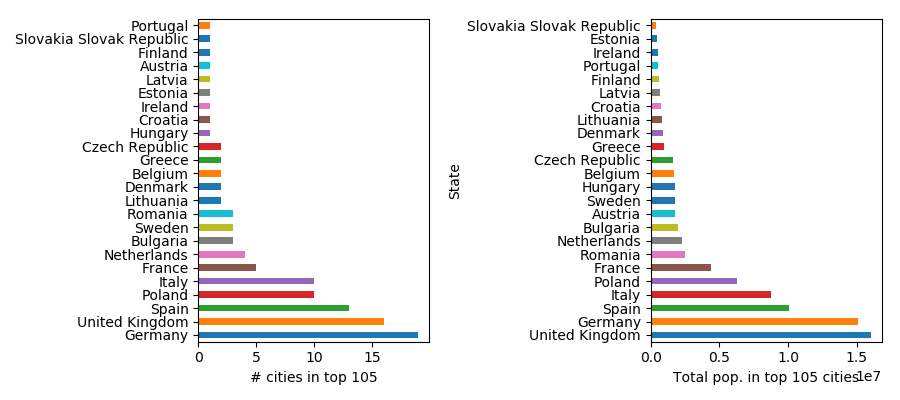

In [56]:
import matplotlib.pyplot as plt
city_counts = df['State'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
city_counts.plot(kind='barh', ax=ax1)
ax1.set_xlabel("# cities in top 105")
df_agg['Population','sum'].plot(kind='barh', ax=ax2)
ax2.set_xlabel("Total pop. in top 105 cities")
fig.tight_layout()

<IPython.core.display.Javascript object>


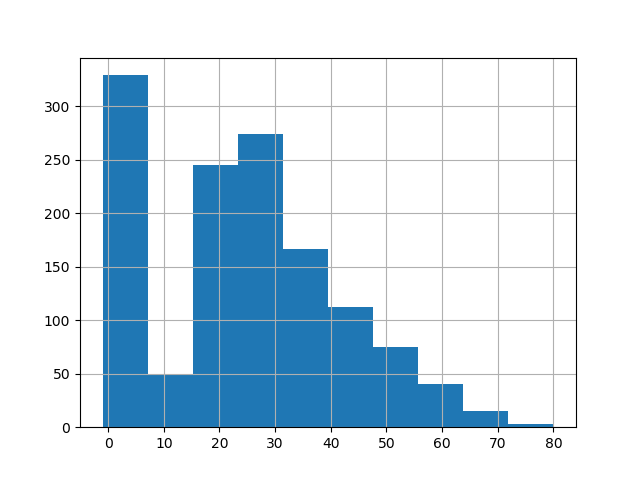

In [57]:
fig = plt.figure()
df_tit2 =  df_tit.fillna(-1)
df_tit2['age'].hist()  # pik w -1 to brakujące dane
plt.show()

<IPython.core.display.Javascript object>


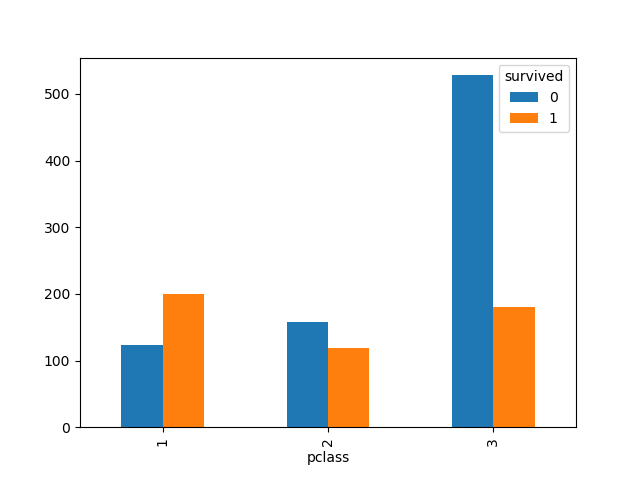

In [58]:
# bar plot z dwóch kolumn
ct = pd.crosstab(df_tit['pclass'], df_tit['survived'])
ct.plot(kind='bar')
plt.show()